In [1]:
import numpy as np
import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

In [2]:
Ynames = ['fLength', 'fWidth', 'fSize', 'fConc', 'fConc1', 'fAsym', 
             'fM3Long', 'fM3Trans', 'fAlpha', 'fDist', 'identity']
featureNames = ['fLength', 'fWidth', 'fSize', 'fConc', 'fConc1', 'fAsym', 
             'fM3Long', 'fM3Trans', 'fAlpha', 'fDist']
filepath = 'magic04.data'
data = pd.read_csv(filepath, names=Ynames, header=None)
data['identity']= data['identity'].map({'g':1, 'h': 0}).astype(int) 
X = data[featureNames].values.astype('float64')
Y = data['identity'].values.astype('int64')

In [3]:
X = StandardScaler().fit_transform(X)
train_Features, test_Features, train_Label, test_Label = train_test_split(X, Y, test_size=0.2, random_state=None) 
train_Features[:2]

array([[ 3.31424567,  2.80656979,  1.36796844, -1.32339186, -1.20495586,
        -3.61464474,  1.57166229, -3.37671737,  2.1997601 ,  1.21401297],
       [-0.65552175, -0.65322384, -0.93933538,  0.48998272,  0.2211866 ,
         0.14752839,  0.18187603, -0.35016872, -1.0577051 , -0.03362816]])

In [4]:
test_Features[:2]

array([[ 0.28581862,  0.01806614,  1.37241207, -0.87428763, -0.71539808,
         0.51753063,  1.22391082, -0.69028189, -0.9468938 ,  0.16554266],
       [ 2.29023791,  1.25087576,  0.98729716, -1.11169474, -1.11989407,
        -1.19294561, -4.03945066,  1.67216861, -0.60362205,  0.78594023]])

In [5]:
train_Label[:4]

array([0, 1, 0, 1])

In [6]:
train_Features.shape

(15216, 10)

In [7]:
test_Label[:4]

array([1, 0, 0, 0])

In [8]:
from keras.models import Sequential
from keras.layers import Dense,Dropout
from keras.callbacks import EarlyStopping
early_stopping = EarlyStopping(monitor='val_loss', patience=3)

Using TensorFlow backend.


In [9]:
model = Sequential()

In [10]:
model.add(Dense(units=10*3,  input_dim=10, 
                kernel_initializer='uniform', 
                activation='relu'))

In [11]:
model.add(Dense(units=10*2, 
                kernel_initializer='uniform', 
                activation='relu'))

In [12]:
model.add(Dense(units=10, 
                kernel_initializer='uniform', 
                activation='relu'))

In [13]:
model.add(Dense(units=1, 
                kernel_initializer='uniform',
                activation='sigmoid'))

In [14]:
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_1 (Dense)              (None, 30)                330       
_________________________________________________________________
dense_2 (Dense)              (None, 20)                620       
_________________________________________________________________
dense_3 (Dense)              (None, 10)                210       
_________________________________________________________________
dense_4 (Dense)              (None, 1)                 11        
Total params: 1,171
Trainable params: 1,171
Non-trainable params: 0
_________________________________________________________________


In [15]:
model.compile(loss='binary_crossentropy', 
              optimizer='adam', metrics=['accuracy'])

In [16]:
train_history =model.fit(x=train_Features, 
                         y=train_Label, 
                         validation_split=0.1, 
                         epochs=30, 
                         batch_size=400,verbose=2,callbacks=[early_stopping])

Train on 13694 samples, validate on 1522 samples
Epoch 1/30
 - 0s - loss: 0.6897 - acc: 0.6384 - val_loss: 0.6833 - val_acc: 0.6748
Epoch 2/30
 - 0s - loss: 0.6634 - acc: 0.7331 - val_loss: 0.6186 - val_acc: 0.7838
Epoch 3/30
 - 0s - loss: 0.5436 - acc: 0.7900 - val_loss: 0.4648 - val_acc: 0.7976
Epoch 4/30
 - 0s - loss: 0.4321 - acc: 0.8045 - val_loss: 0.4190 - val_acc: 0.8114
Epoch 5/30
 - 0s - loss: 0.4071 - acc: 0.8143 - val_loss: 0.4058 - val_acc: 0.8206
Epoch 6/30
 - 0s - loss: 0.3966 - acc: 0.8227 - val_loss: 0.3959 - val_acc: 0.8272
Epoch 7/30
 - 0s - loss: 0.3868 - acc: 0.8309 - val_loss: 0.3886 - val_acc: 0.8344
Epoch 8/30
 - 0s - loss: 0.3790 - acc: 0.8365 - val_loss: 0.3822 - val_acc: 0.8384
Epoch 9/30
 - 0s - loss: 0.3725 - acc: 0.8423 - val_loss: 0.3782 - val_acc: 0.8384
Epoch 10/30
 - 0s - loss: 0.3671 - acc: 0.8459 - val_loss: 0.3737 - val_acc: 0.8397
Epoch 11/30
 - 0s - loss: 0.3628 - acc: 0.8505 - val_loss: 0.3732 - val_acc: 0.8364
Epoch 12/30
 - 0s - loss: 0.3598 - a

In [17]:
import matplotlib.pyplot as plt
def show_train_history(train_history,train,validation):
    plt.plot(train_history.history[train])
    plt.plot(train_history.history[validation])
    plt.title('Train History')
    plt.ylabel(train)
    plt.xlabel('Epoch')
    plt.legend(['train', 'validation'], loc='upper left')
    plt.show()

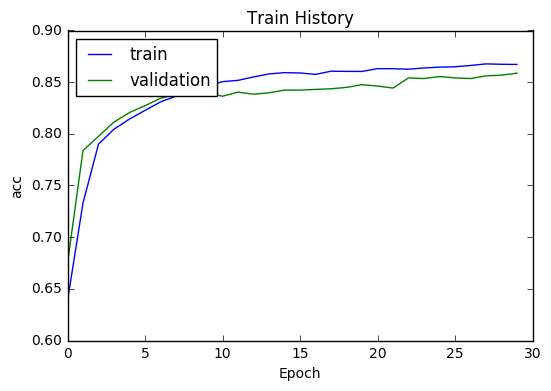

In [18]:
show_train_history(train_history,'acc','val_acc')

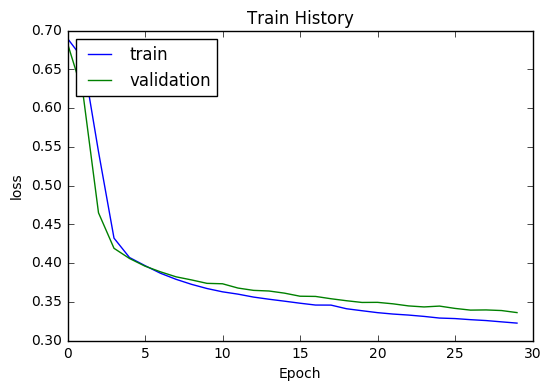

In [19]:
show_train_history(train_history,'loss','val_loss')

In [20]:
scores = model.evaluate(x=test_Features, 
                        y=test_Label)

3804/3804 [==============================] - 0s 55us/step


In [21]:
scores[1]

0.8680336488534224